In [1]:
import pandas as pd
import glob
import os
import numpy as np
import pickle
import statistics
import community
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import analysis as an
import pandas as pd


import numpy as np
import seaborn as sns

from scipy import stats as spy_stats
import scipy
import pprint as pp

In [2]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'6_*')
submod_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/6_submod_dict_08-13-2020_11-00-17


In [3]:
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'5_*')
summary_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/5_summary_dict_07-31-2020_05-51-27


In [22]:
latest_file=an.find_latest(os.path.join(basepath,'tmp'),'7_*')
subgraph_dict=an.onetoughjar(latest_file)

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/7_subgraph_dict_08-27-2020_05-16-33


In [24]:
subgraph_dict['no'][0].nodes(data=True)

NodeDataView({0: {'centrality': 0.0064897671177409555, 'clustering': 0.6437710437710438, 'PC': 0.6895638031566824, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 0, 'sub_zDegree': 0.0}, 24: {'centrality': 0.01252232649388041, 'clustering': 0.6076388888888888, 'PC': 0.6760964863160694, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 1, 'sub_zDegree': 0.0}, 38: {'centrality': 0.0065647443593222984, 'clustering': 0.5475609756097561, 'PC': 0.6487725886697757, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 2, 'sub_zDegree': 0.0}, 31: {'centrality': 0.011105955087203292, 'clustering': 0.6101694915254238, 'PC': 0.6991148215618905, 'modules': 0, 'zDegree': -0.3444005599566023, 'sub_modules': 3, 'sub_zDegree': 0.0}})

In [ ]:
submod_dict['no'][0]

In [19]:
for k,v in summary_dict['NR'].items():
    # community.induced_graph(partition dictionary, graph)
     comm_graph = community.induced_graph(v['modules']['partition'], v['graphs'])
     v.update(comm_graph = comm_graph)

In [20]:
edges = {}

for group, stuff in summary_dict['NR'].items():
    print(group)
    _df = nx.to_pandas_edgelist(stuff['comm_graph'])
#     _df[(_df['source'] != _df['target']), 'weight'] == 0
    _df.loc[(_df['source'] == _df['target']), 'weight'] = 0

    _df['group']=group
    edges[group]=_df

edge_df=pd.concat(list(edges.values()))

no
ov
ob


In [21]:
edge_df

,source,target,weight,group
0,0,0,0.000000,no
1,0,1,3.752885,no
2,0,2,0.598493,no
3,0,3,-1.952849,no
4,0,4,-0.273101,no
...,...,...,...,...
40,6,7,-0.067282,ob
41,6,8,0.585246,ob
42,7,7,0.000000,ob
43,7,8,0.009891,ob


In [ ]:
summary_dict['NR']['no'].keys()

In [ ]:
def zscore(col):
    col_z = (col - col.mean())/col.std(ddof=0)
    return(col_z)

In [ ]:
edge_df['z_weight']=zscore(edge_df['weight'])

In [ ]:
for k,v in summary_dict['NR'].items():
    test=edge_df[edge_df['group']==k]
    keyz = list(zip(test['source'],test['target']))
    values=test['z_weight']
    up_dict={}
    for i in range(len(keyz)):
        up_dict[keyz[i]]={'z_edge':values[i]}
    nx.set_edge_attributes(v['comm_graph'], up_dict)


In [ ]:
aes_dict={'no':{},
          'ov':{},
          'ob':{}}
for group, stuff in summary_dict['NR'].items():
    print(group)
    G=stuff['comm_graph']
    aes_dict[group]=an.aesthetics(G,15000,100, 'sans-serif', 'Bold', 'z_edge', (80,50), 1)

In [ ]:
for key, graph in summary_dict['NR'].items():
    print(key)
    G=graph['comm_graph']
    aes=aes_dict[key]
    an.module_fig(G,'%s z-score'%key, basepath, aes)

0.49547032307692307
0.4980885128205128


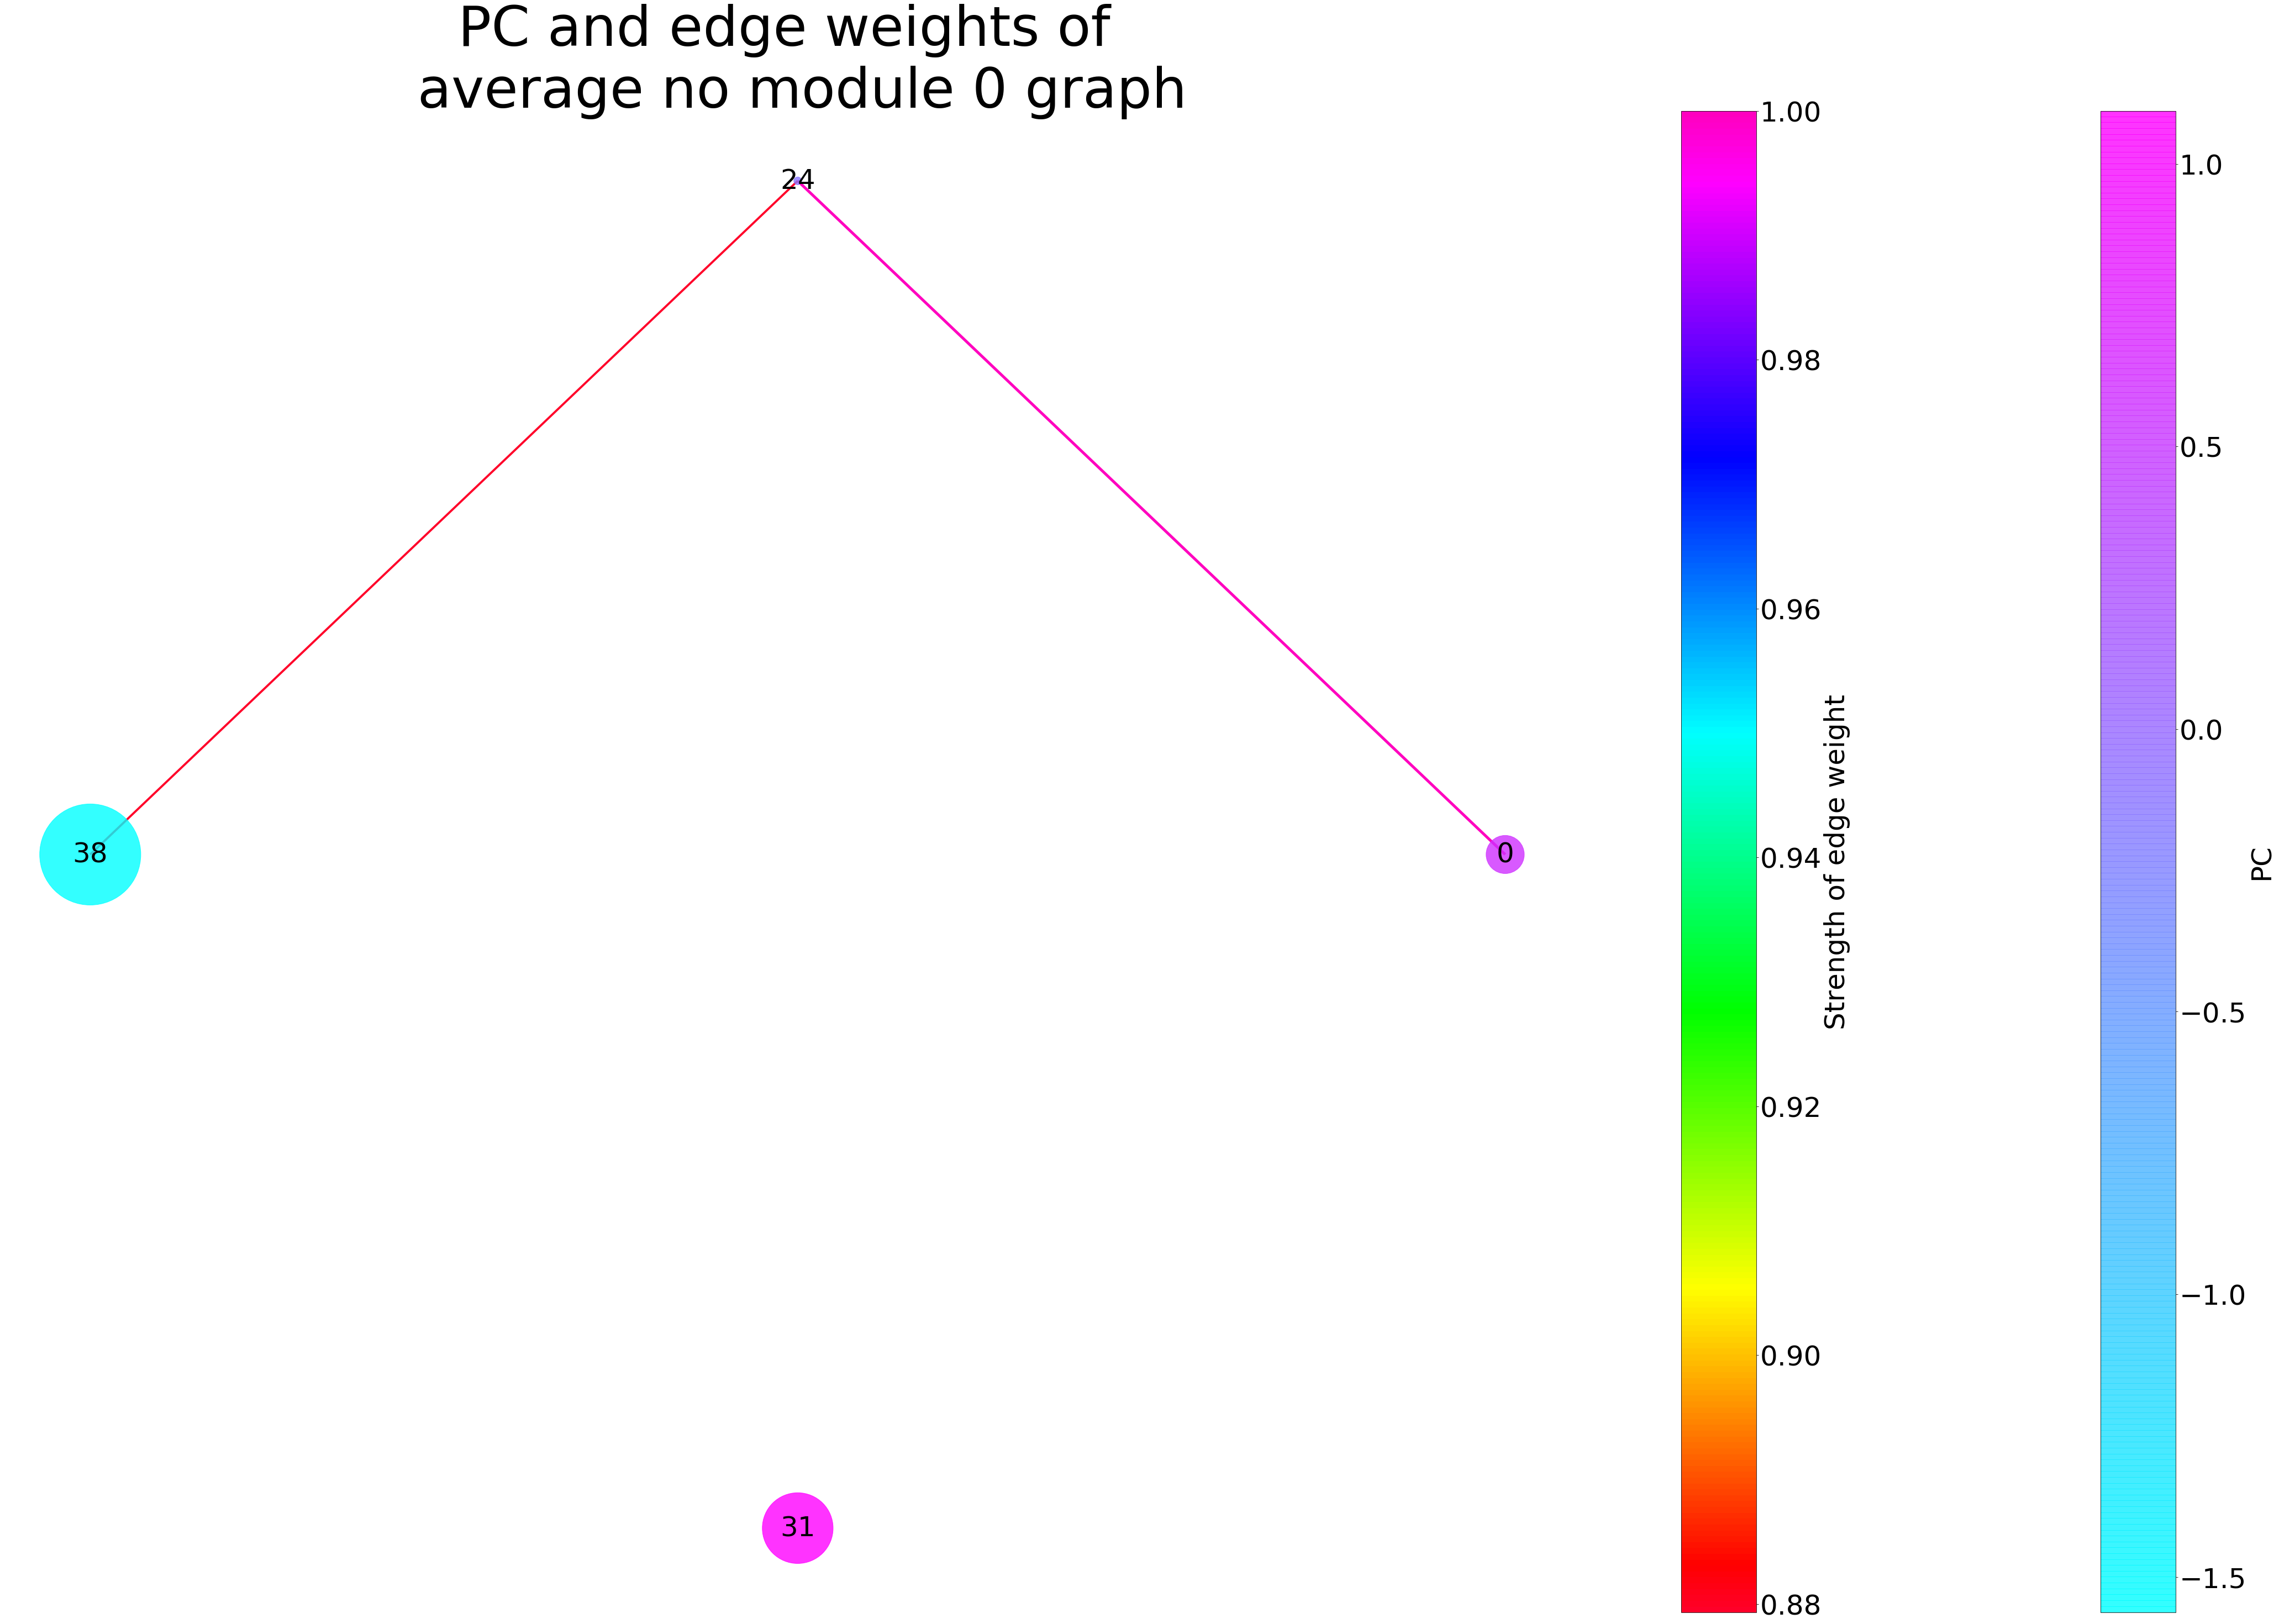

0.49677948073394496
0.49765522018348624


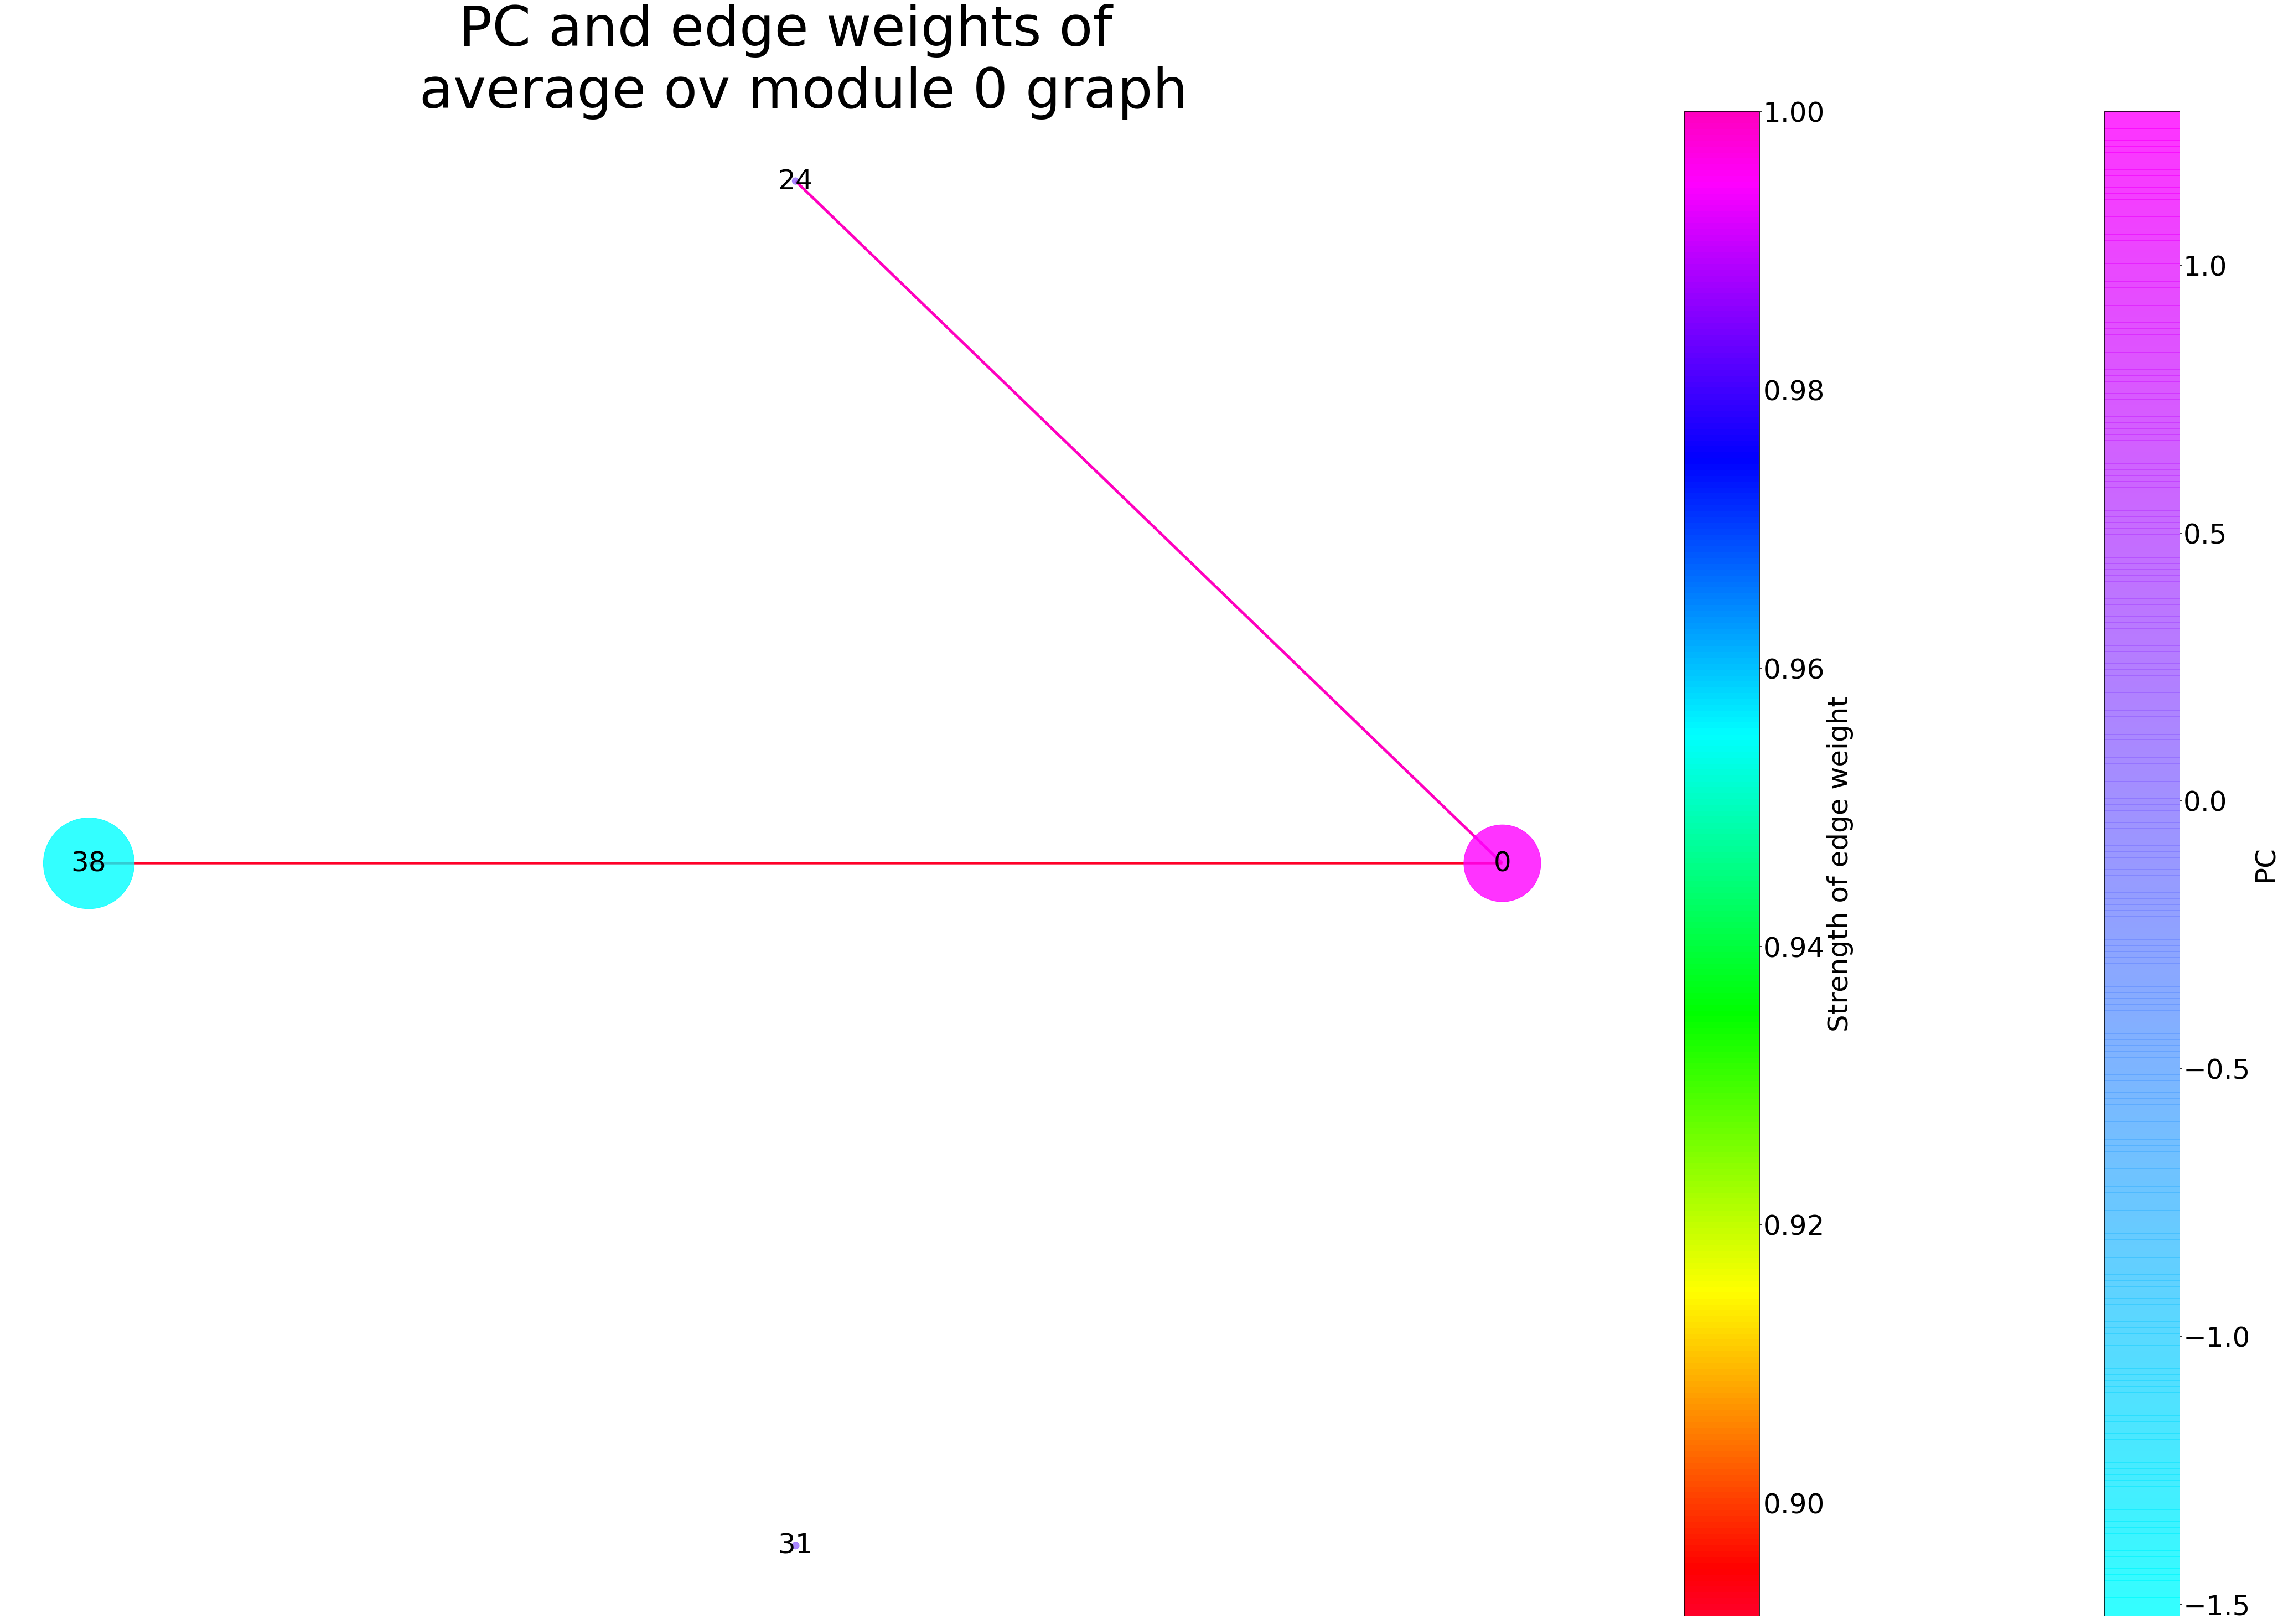

0.4675409230769231
0.46850507692307686


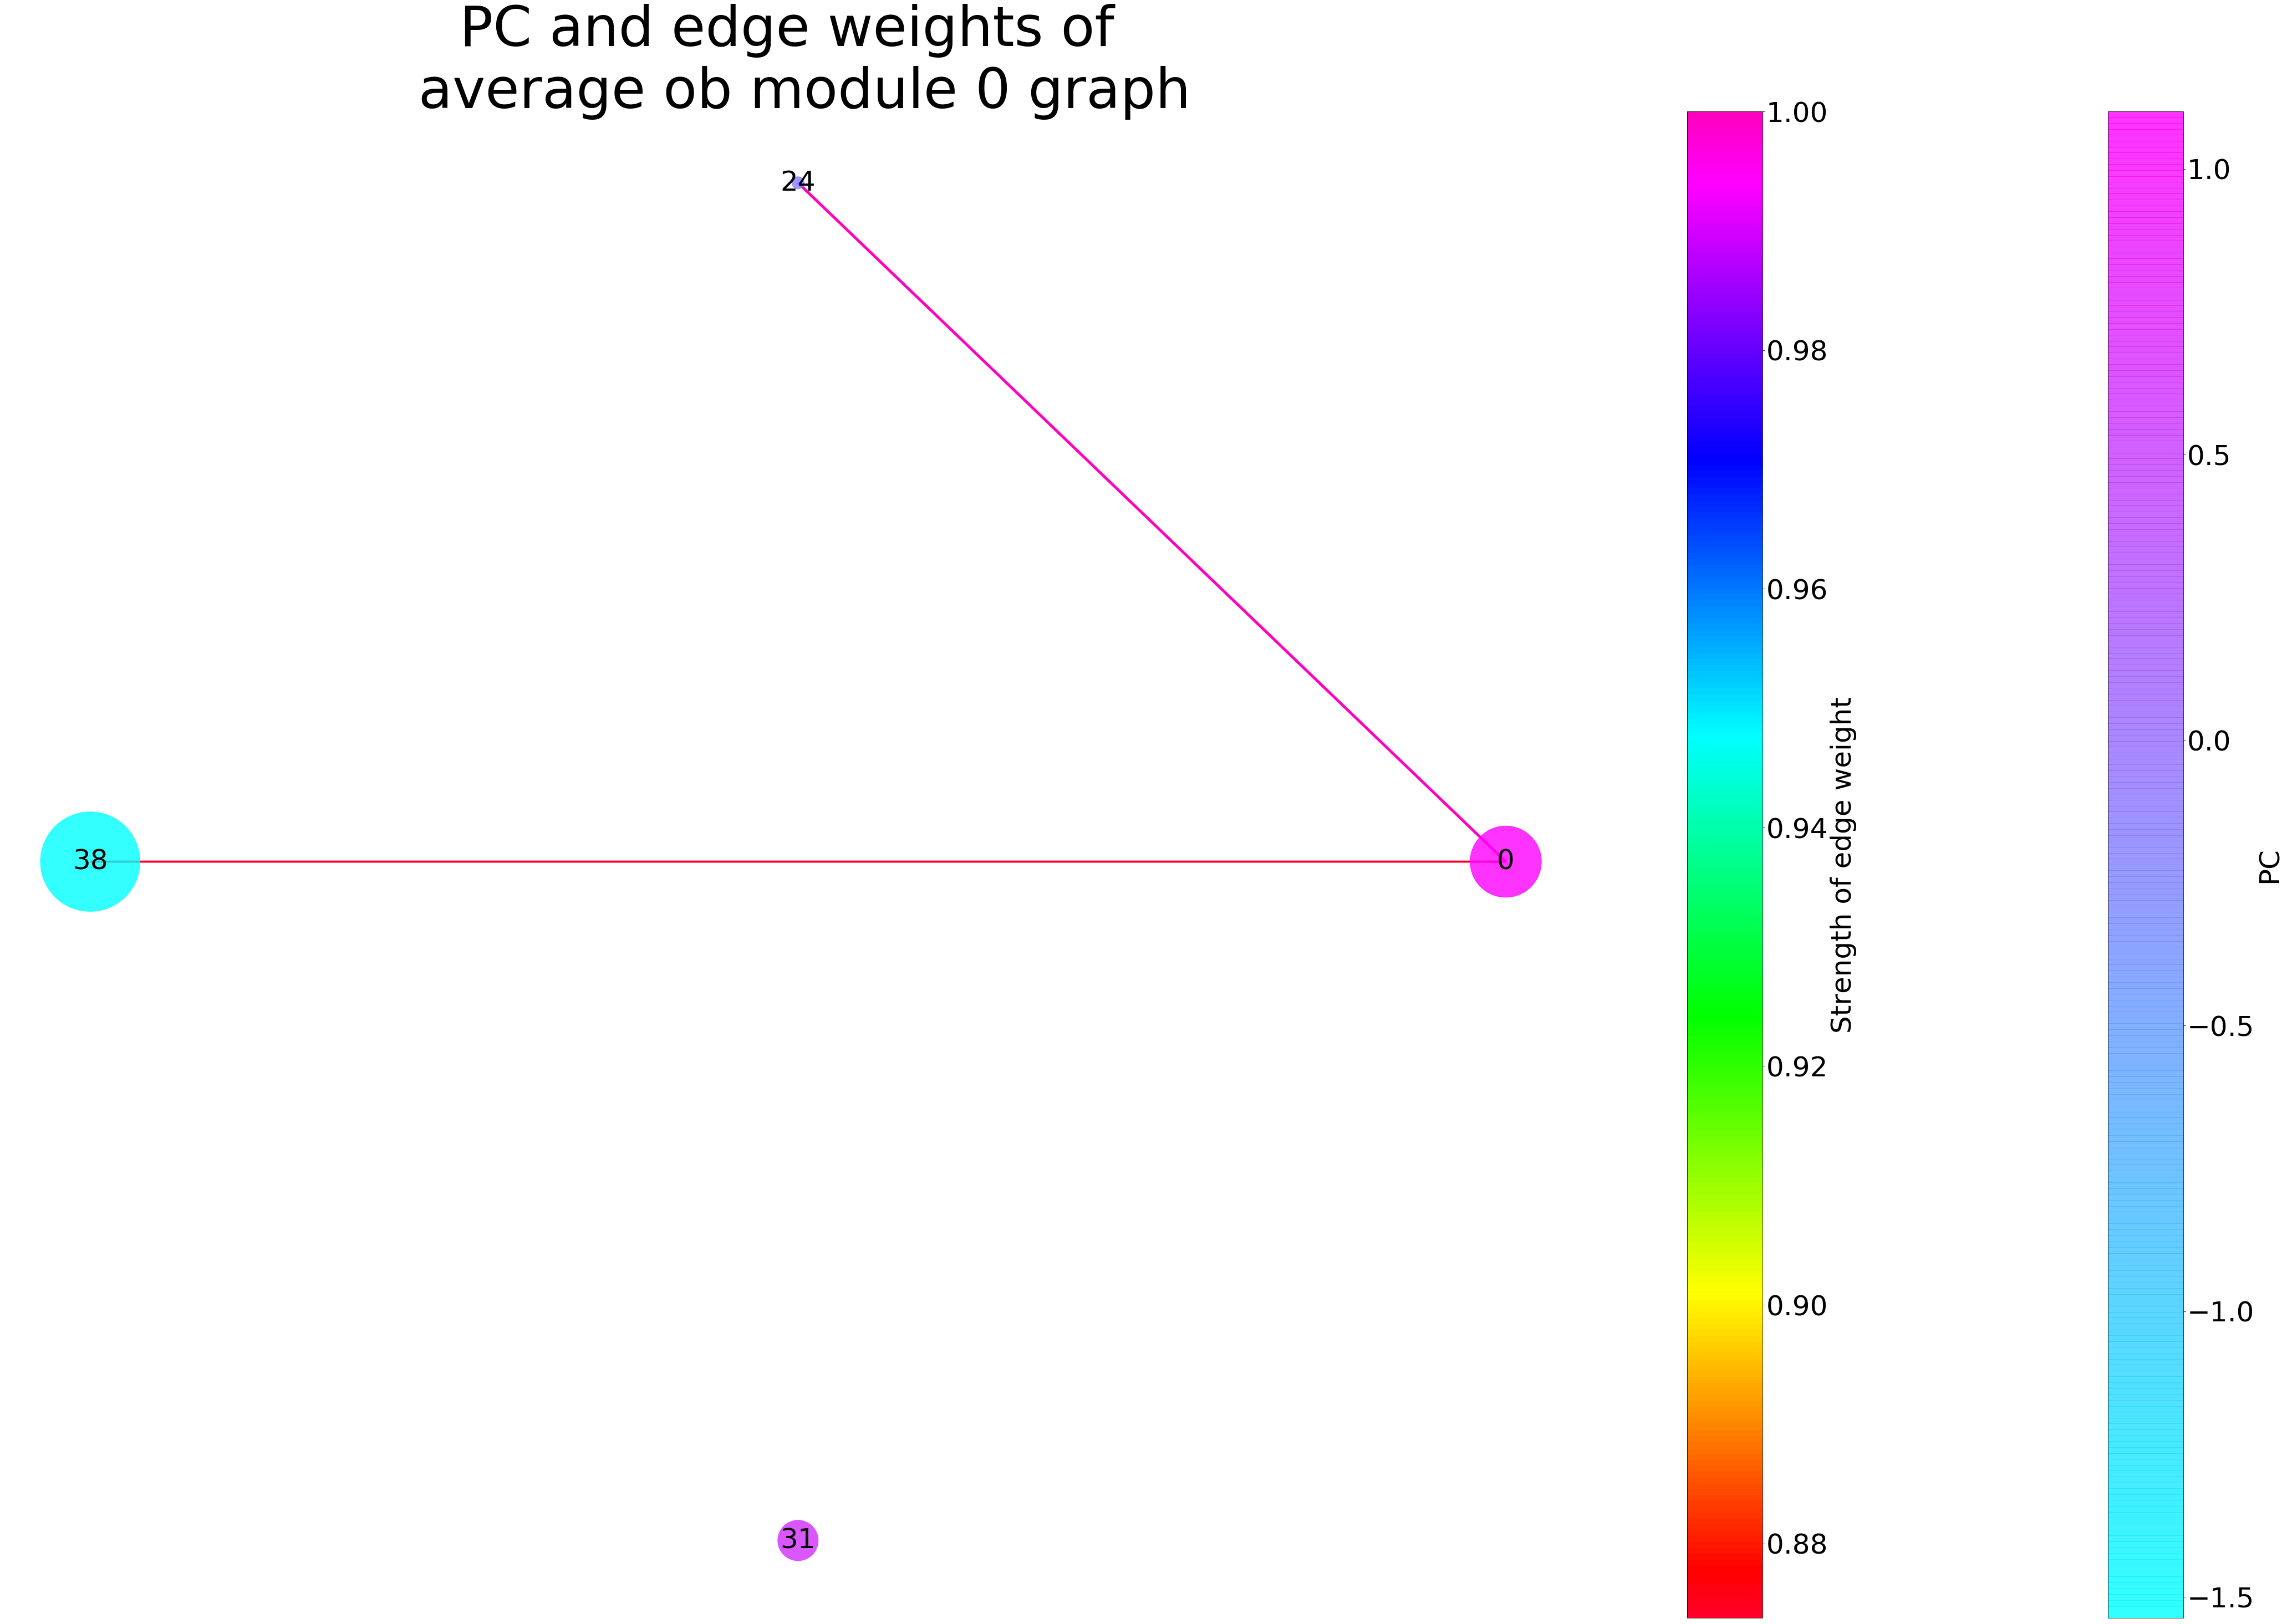

In [25]:
%matplotlib inline
i = 0
for key, graph in subgraph_dict.items():
    an.inner_mod(graph[i], 'PC', '%s module %i'%(key,i), 40, 'circle')

In [26]:
subgraph_dict['ov'][4].nodes(data=True)

NodeDataView({67: {'centrality': 0.004085686779310707, 'clustering': 0.7083576855639977, 'PC': 0.6741289934725874, 'modules': 4, 'zDegree': 2.1667124927080144, 'sub_modules': 0, 'sub_zDegree': 0.0}, 73: {'centrality': 0.005358167590641681, 'clustering': 0.6864406779661016, 'PC': 0.6122251796143435, 'modules': 4, 'zDegree': 2.1667124927080144, 'sub_modules': 1, 'sub_zDegree': 0.0}, 74: {'centrality': 0.007351540073787377, 'clustering': 0.6184012066365008, 'PC': 0.5779312307312279, 'modules': 4, 'zDegree': 2.1667124927080144, 'sub_modules': 2, 'sub_zDegree': 0.0}, 76: {'centrality': 0.005882017444641367, 'clustering': 0.6289640591966174, 'PC': 0.4665750663971895, 'modules': 4, 'zDegree': 2.1667124927080144, 'sub_modules': 3, 'sub_zDegree': 0.0}, 77: {'centrality': 0.005860537444534589, 'clustering': 0.661952861952862, 'PC': 0.5998559213765813, 'modules': 4, 'zDegree': 2.1667124927080144, 'sub_modules': 4, 'sub_zDegree': 0.0}, 48: {'centrality': 0.005676324704679921, 'clustering': 0.67793

0.07152491923076924
0.07284040384615385


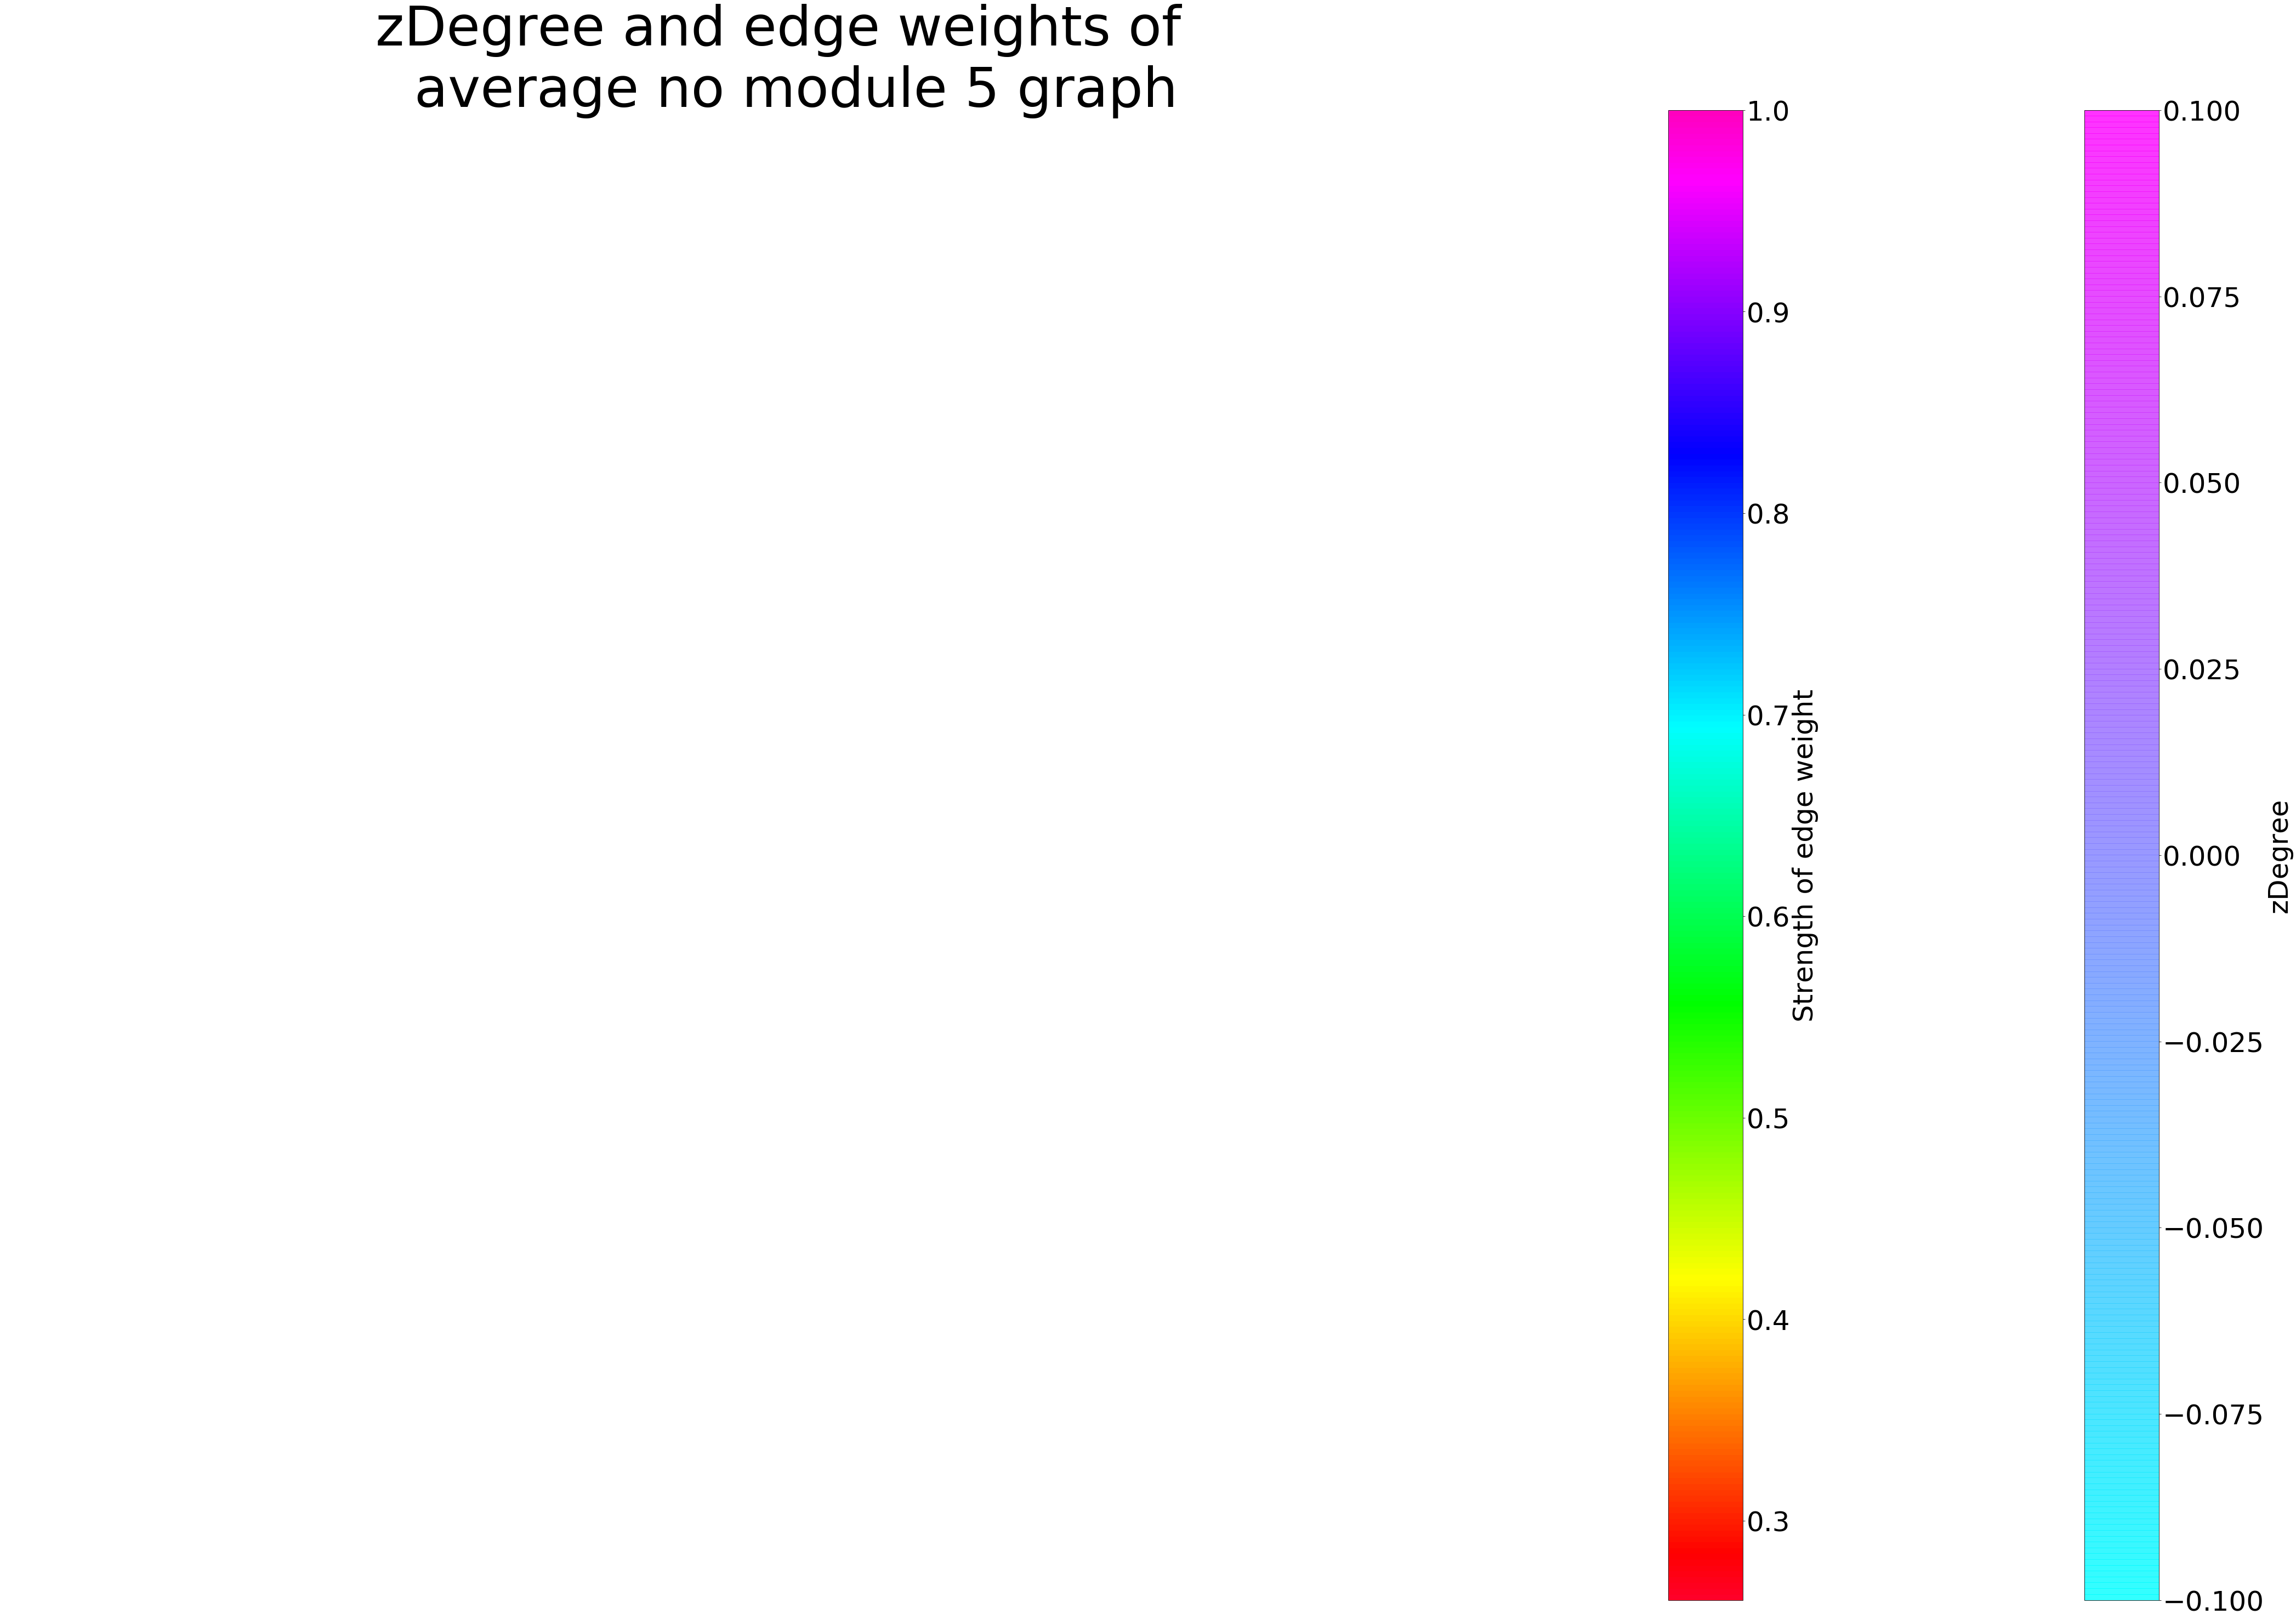

0.0694435504587156
0.07182569724770642


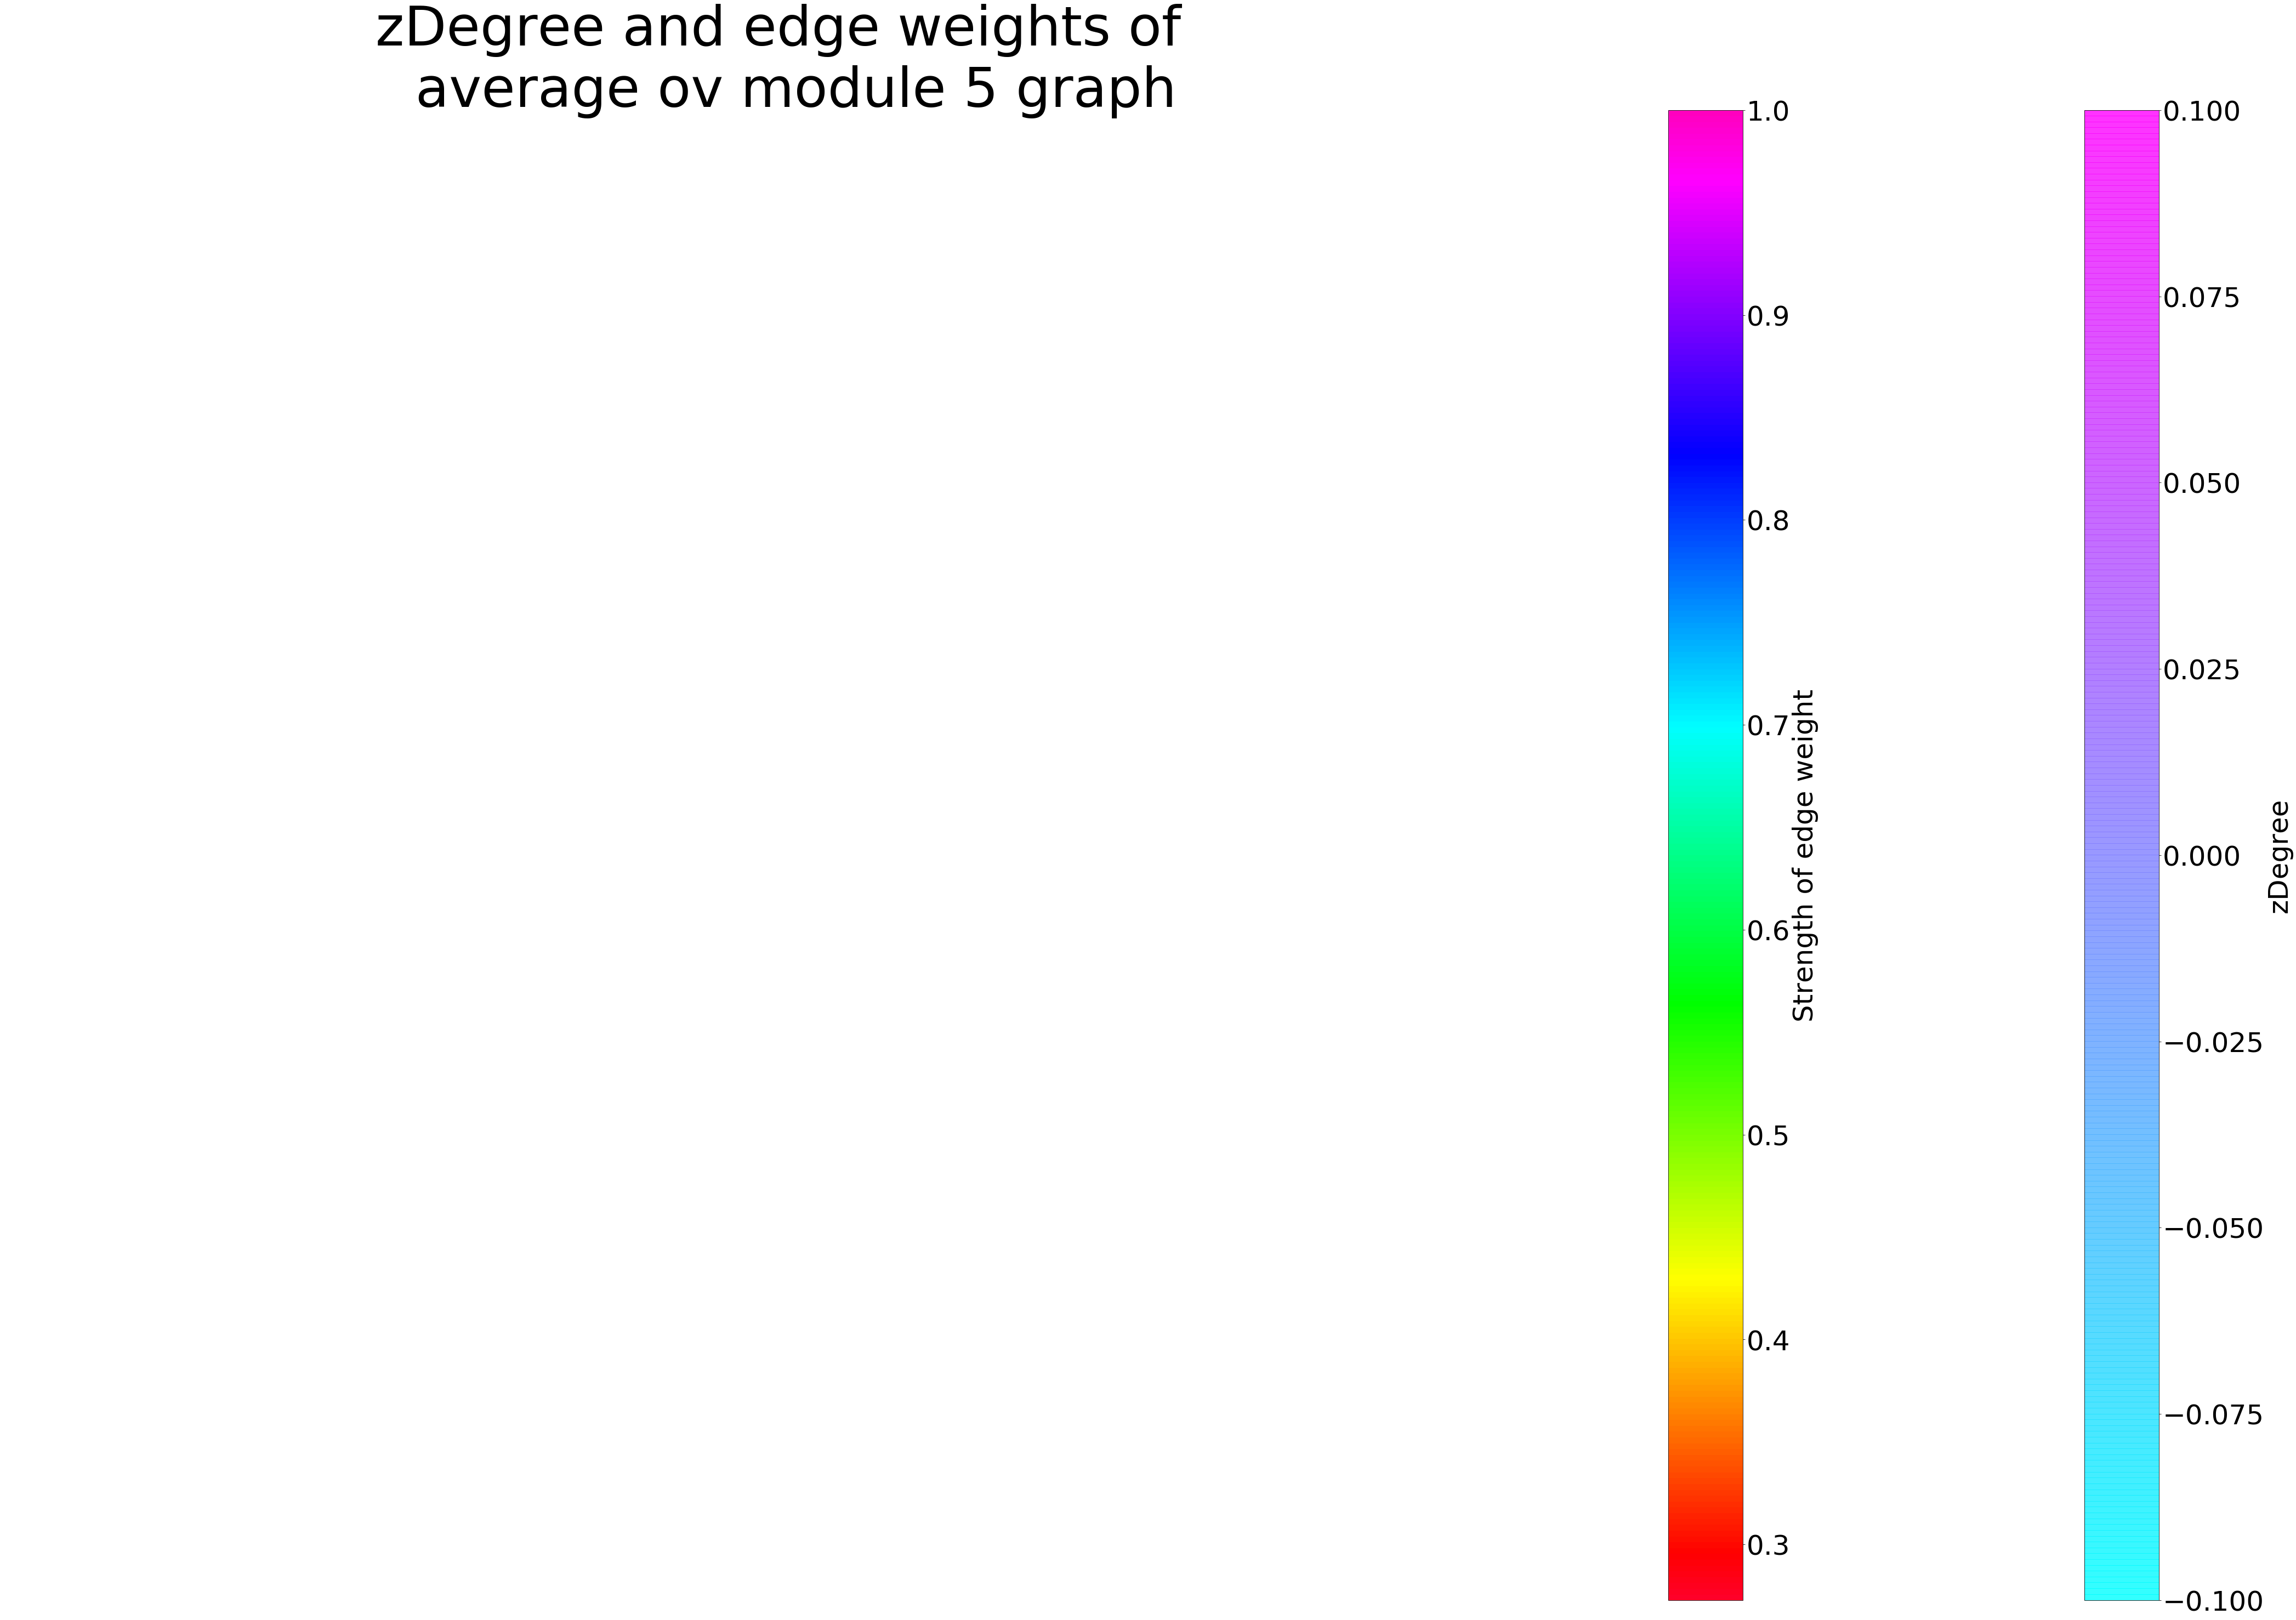

0.2920741794871795
0.29691896153846153


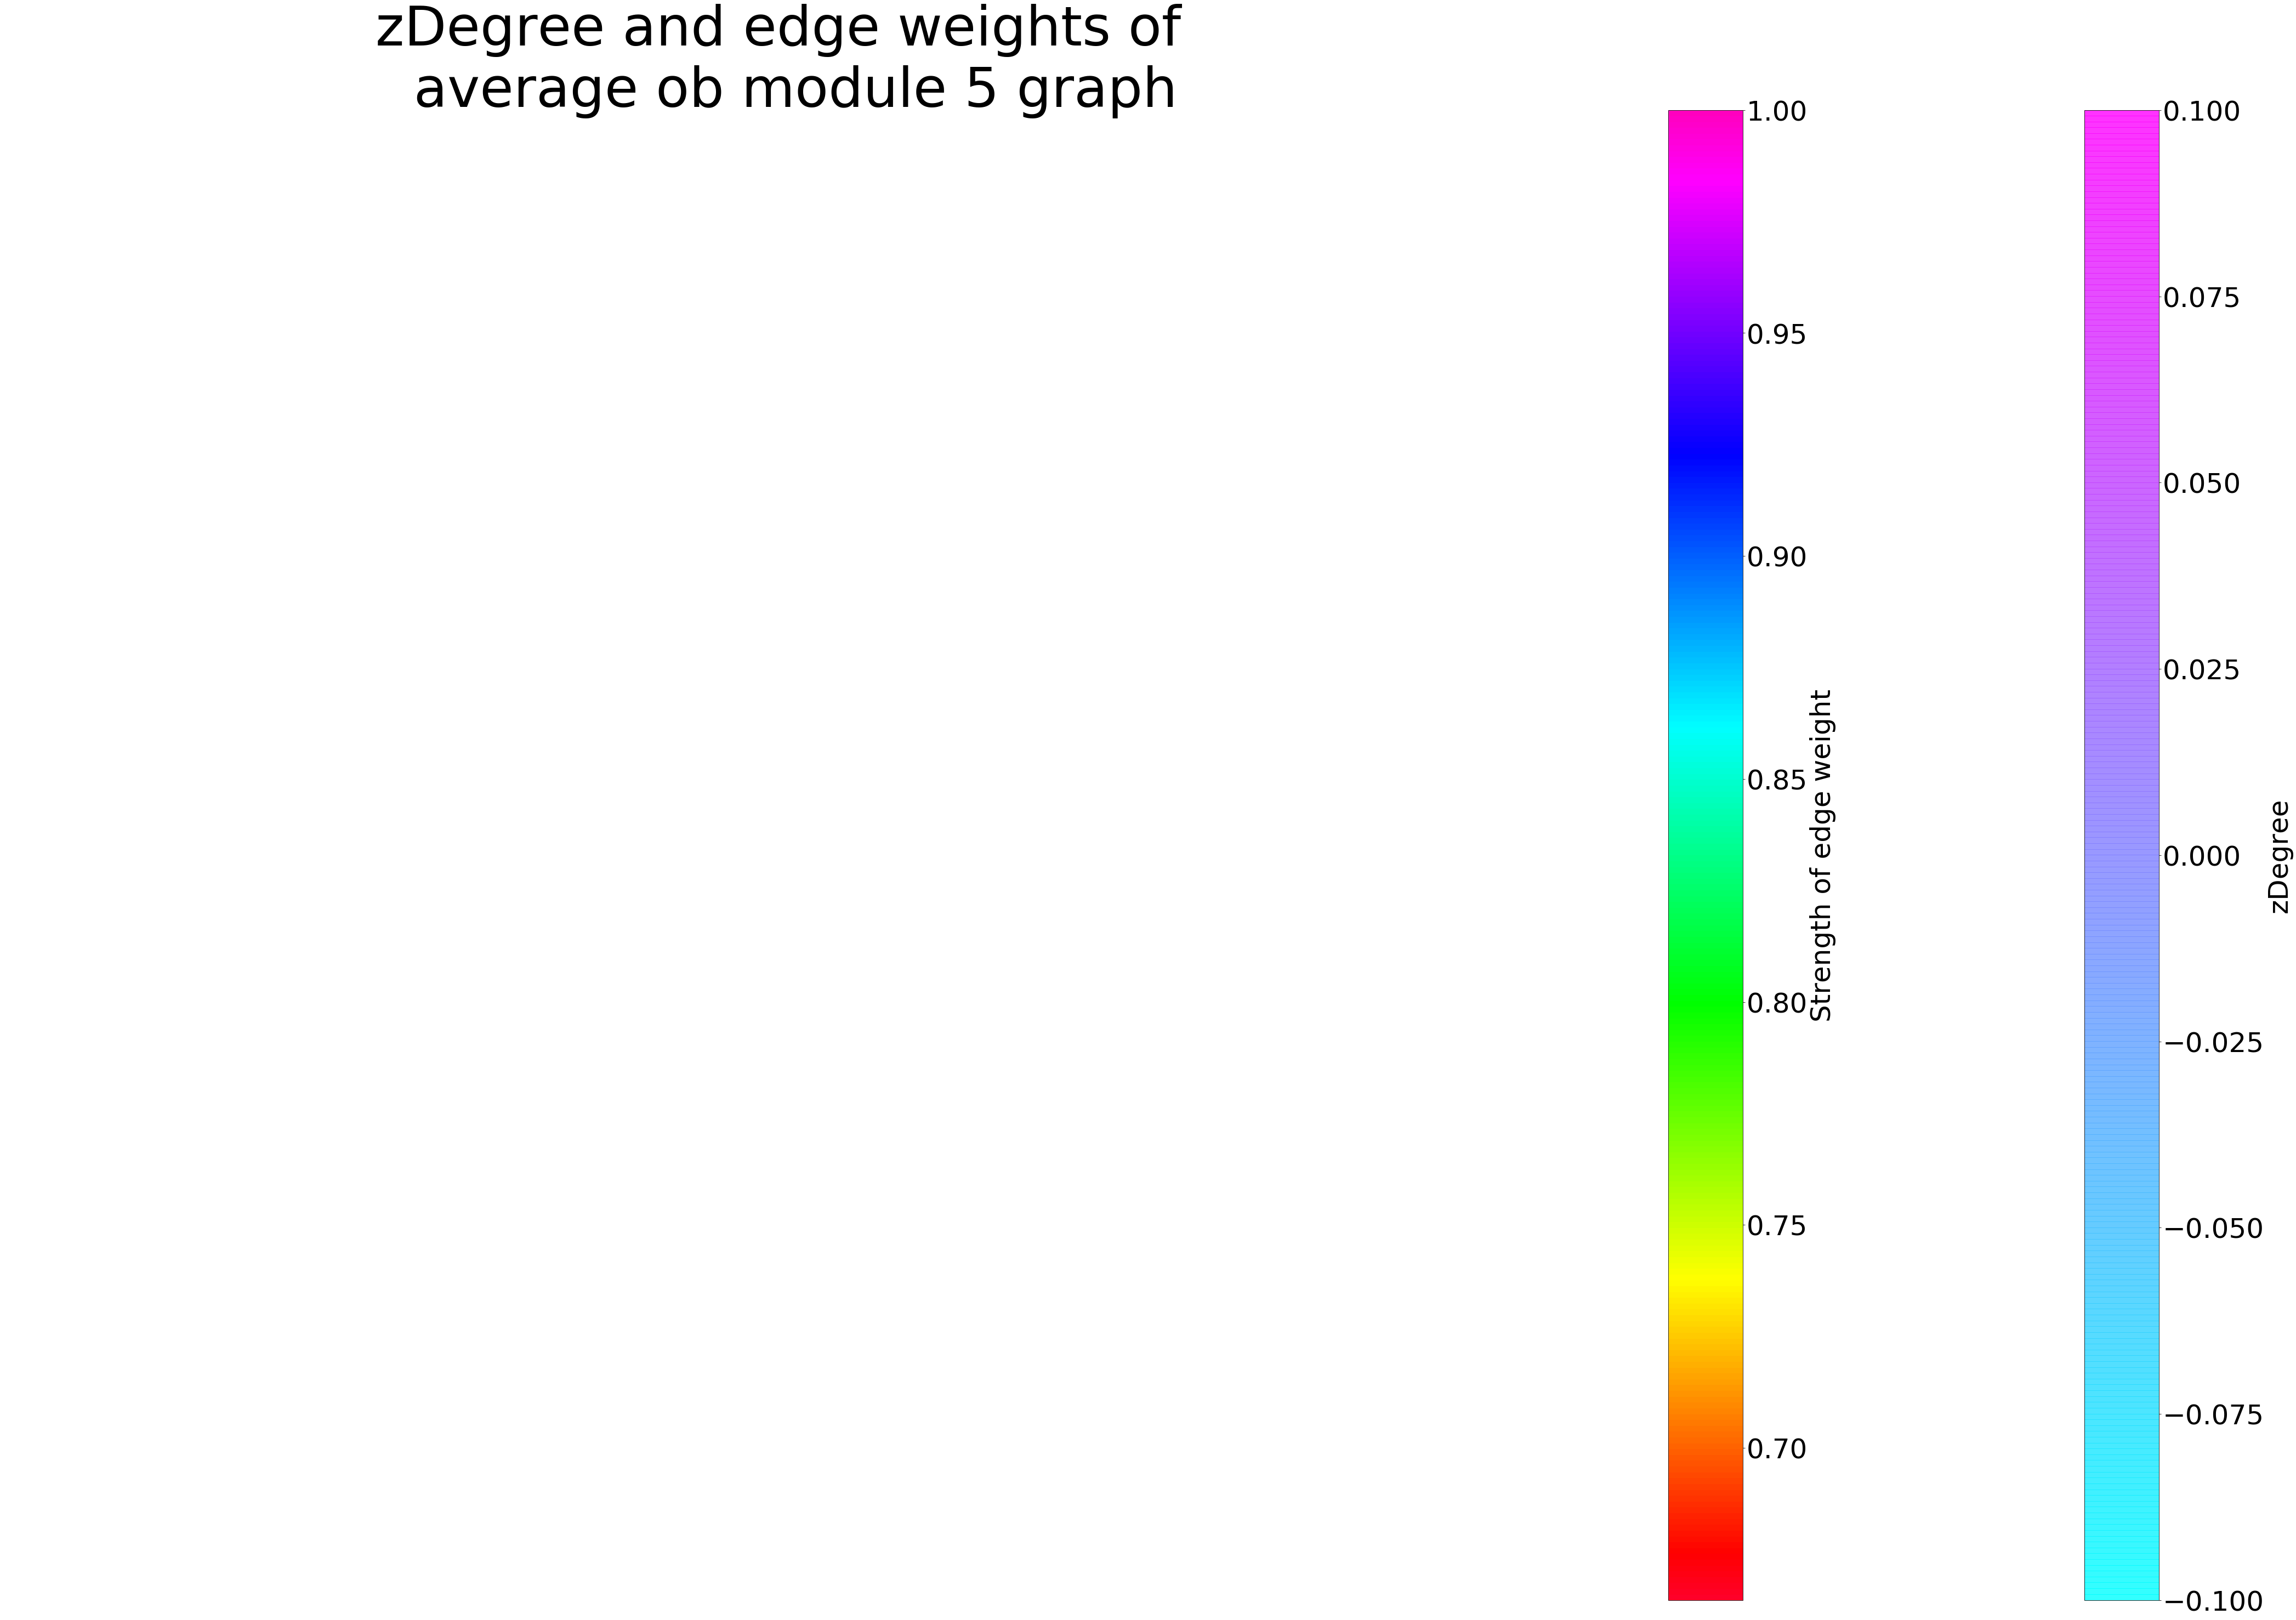

In [33]:
i = 5
for key, graph in subgraph_dict.items():
    an.inner_mod(graph[i], 'zDegree', '%s module %i'%(key,i), 40, 'circle')

In [32]:
subgraph_dict['no'][5].nodes(data=True)

NodeDataView({64: {'centrality': 0.0028049362128225357, 'clustering': 0.7414965986394558, 'PC': 0.6049350027491021, 'modules': 5, 'zDegree': -1.5017417373074566, 'sub_modules': 0, 'sub_zDegree': 0.0}, 66: {'centrality': 0.005626126260900243, 'clustering': 0.6819672131147541, 'PC': 0.7383688009917533, 'modules': 5, 'zDegree': -1.5017417373074566, 'sub_modules': 1, 'sub_zDegree': 0.0}, 98: {'centrality': 0.0038171686692841105, 'clustering': 0.7293233082706767, 'PC': 0.676391385623887, 'modules': 5, 'zDegree': -1.5017417373074566, 'sub_modules': 2, 'sub_zDegree': 0.0}, 68: {'centrality': 0.0038709401509369286, 'clustering': 0.7295597484276729, 'PC': 0.6869664028633387, 'modules': 5, 'zDegree': -1.5017417373074566, 'sub_modules': 3, 'sub_zDegree': 0.0}, 99: {'centrality': 0.0036685973311354095, 'clustering': 0.7344155844155844, 'PC': 0.6890040573691756, 'modules': 5, 'zDegree': -1.5017417373074566, 'sub_modules': 4, 'sub_zDegree': 0.0}, 75: {'centrality': 0.005155795722486779, 'clustering'

In [39]:
nodes, color = zip(*nx.get_node_attributes(subgraph_dict['no'][5], 'sub_zDegree').items())

In [40]:
nodes

(64, 66, 98, 68, 99, 75, 78, 86, 62)

In [41]:
color

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

0.07152491923076924
0.07284040384615385


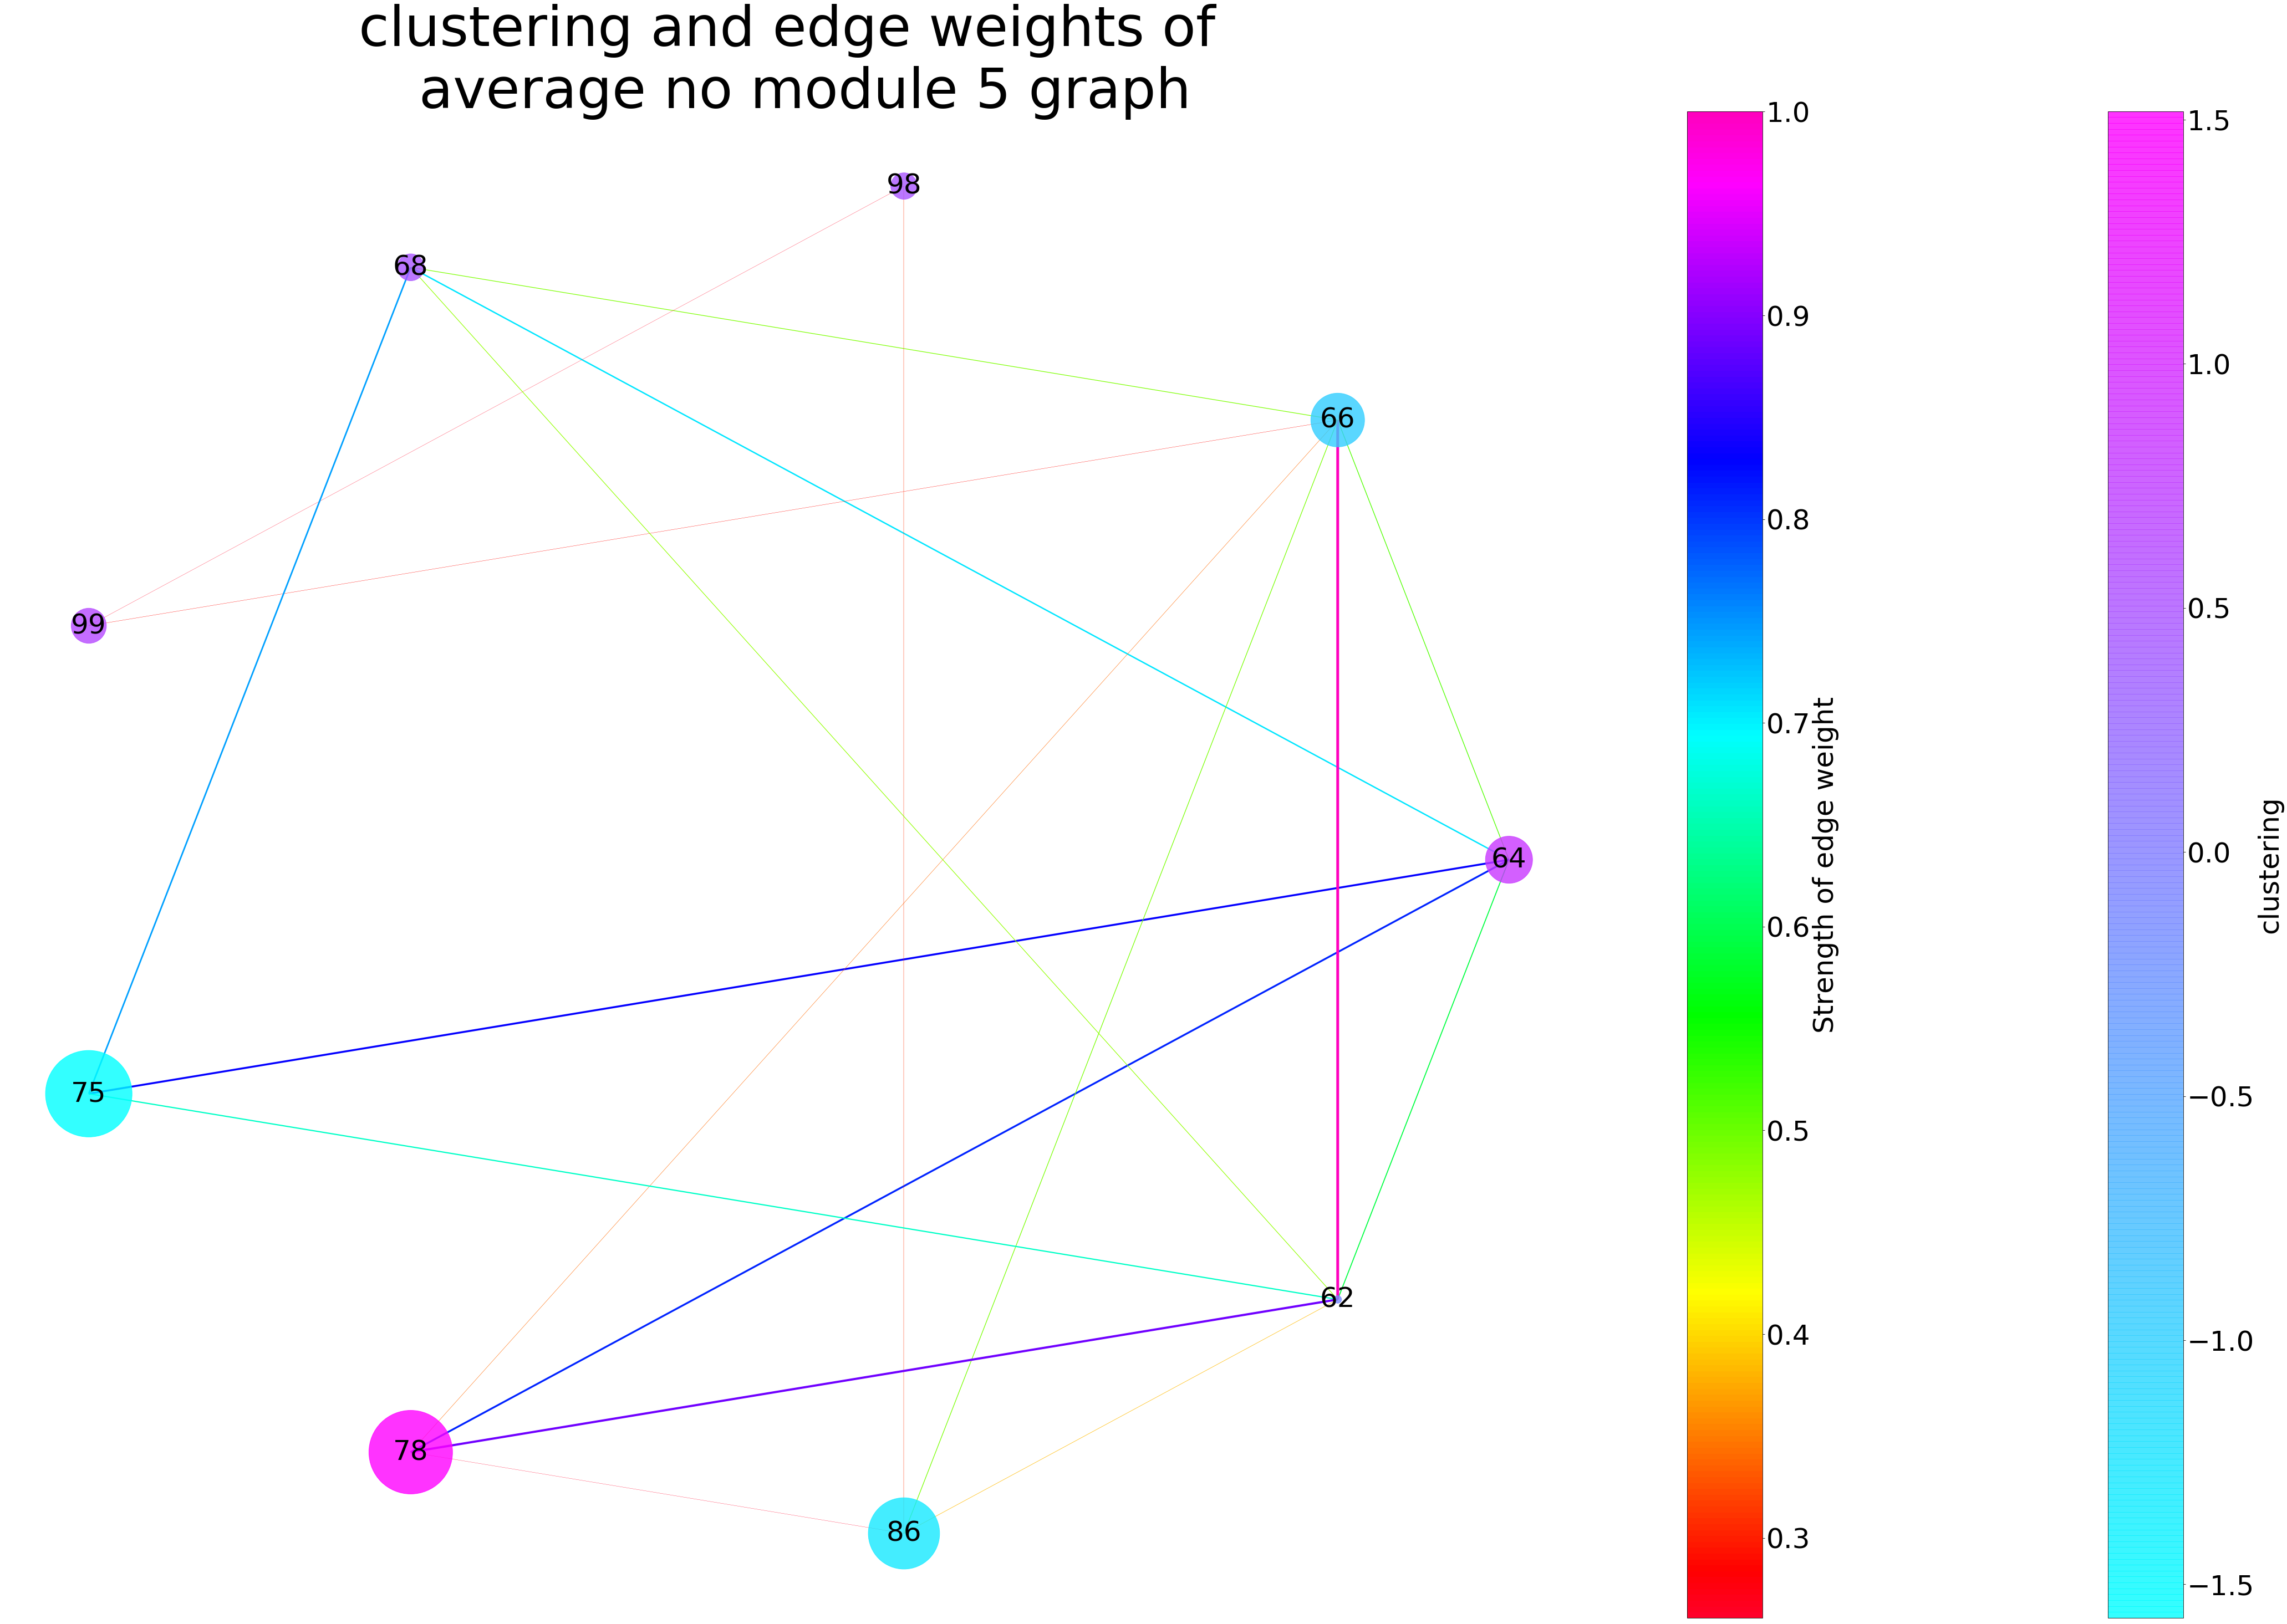

In [35]:
an.inner_mod(subgraph_dict['no'][5], 'clustering', '%s module %s'%('no','5'), 40, 'circle')